In [1]:
%matplotlib inline
from numpy import *
from pylab import *

In [2]:
def species(soubor):
	species = file(soubor,"r")
	speci = []	
	pomoc = {}
	index = 0			
	for line in species:
		name, init_conc = line.split()
		speci.append(1)
		speci[index] = Prvky(name, float(init_conc))
		pomoc[name] = index
		index += 1
	species.close()
	return speci, pomoc

In [3]:
def reactions(soubor):
	reaction = file(soubor,"r")
	index = 0
	rovnice = []
	for line in reaction:
		react = line.split()
		rovnice.append(0)
		rovnice[index] = Rovnice(react)
		index += 1
	reaction.close() 
	equation_count = index
	return rovnice, equation_count

In [4]:
class Prvky:
	def __init__(self, name = 0, con = 0):
		self.name = name
		self.concentrace = con

In [5]:
class Rovnice:
	def __init__(self, react):
		rozdel = react.index("=>")
		self.reactant = react[1:rozdel]
		self.product = react[rozdel+1:len(react)]
		self.rate = float(react[0])

	def create_odr(self, dndt, time_step):
		dnn = self.rate
		for i in range(len(self.reactant)):
			dnn *= speci[pomoc[self.reactant[i]]].concentrace
			#if self.reactant.count(speci[pomoc[self.reactant[i]]].name) > 1: break	# stene prvky musi byt na konci
		for i in range(len(self.reactant)): 
			if (self.reactant.count(speci[pomoc[self.reactant[i]]].name) > self.product.count(speci[pomoc[self.reactant[i]]].name)):
				if (speci[pomoc[self.reactant[i]]].concentrace < dnn*time_step): 
					dnn = speci[pomoc[self.reactant[i]]].concentrace/time_step
		for i in range(len(speci)):	
			if ((speci[i].name in self.reactant) or (speci[i].name in self.product)): 
				value = self.reactant.count(speci[i].name) - self.product.count(speci[i].name)
				if (value > 0):	
					dnn *= value
					dndt[i] -= dnn
				if (value < 0):	
					dnn *= -value
					dndt[i] += dnn				

		return dndt

In [6]:
def solve_odr(time_step, dndt_res, spec_res):
		spec_res += time_step * dndt_res	
		for i in range(len(spec_res)):
			if spec_res[i] < 1: spec_res[i] = 0
			speci[i].concentrace = spec_res[i]
		return spec_res

In [7]:
def concentration(file_species, file_reactions, time, time_step):
	vyvoj = []
	cas = []
	global speci, pomoc
	speci, pomoc = species(file_species)
	reaction, equations = reactions(file_reactions)

	res =  zeros(len(speci), float)
	for i in range(len(speci)):
		res[i] = speci[i].concentrace
	res = array(res)

	vyvoj.append([speci[0].concentrace,speci[1].concentrace,speci[2].concentrace,speci[3].concentrace,speci[4].concentrace,speci[5].concentrace,speci[6].concentrace])	
	cas.append(0)
	for i in range(int(time/time_step)):
		dndt = zeros(len(speci), float)
		for j in range(equations):
			reaction[j].create_odr(dndt, time_step)
		#print res
		res = solve_odr(time_step, dndt, res)
		vyvoj.append(res.tolist())
		cas.append(i)

	vyvoj = array(vyvoj)
	cas = array(cas)
	
	conc = {}
	for i in range(len(speci)):
		conc[speci[i].name] = speci[i].concentrace
		print speci[i].name, speci[i].concentrace

	return conc,cas,vyvoj

In [8]:
file_species = "my_speci_test.txt"			#
file_reactions = "my_reaction_test_bez_rekombinace_h3.txt"
time = 1e-9			
time_step = time/10000		# pro time e-9 alespon 10000, pro vetsi time pridavat
concentrations,cas,vyvoj = concentration(file_species, file_reactions, time, time_step)

e- 1.74458297106e+21
H2 3.57230845175e+13
H2+ 6.06085894038e+15
H 1.04440146489e+18
H+ 1.68726784996e+21
H3+ 6.45546392547e+19
H- 1.16376482245e+16


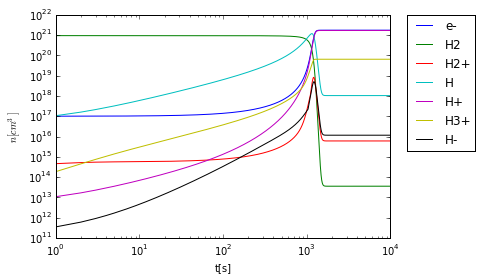

In [9]:
loglog(cas[:], vyvoj[:,0], label = "e-")
loglog(cas[:], vyvoj[:,1], label = "H2")
loglog(cas[:], vyvoj[:,2], label = "H2+")
loglog(cas[:], vyvoj[:,3], label = "H")
loglog(cas[:], vyvoj[:,4], label = "H+")
loglog(cas[:], vyvoj[:,5], label = "H3+")
loglog(cas[:], vyvoj[:,6], label = "H-")

xlabel("t[s]")
ylabel("$n[cm^3]$")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
file_species = "my_speci_test.txt"			#
file_reactions = "my_reaction_test.txt"
time = 1e-9			
time_step = time/10000		# pro time e-9 alespon 10000, pro vetsi time pridavat
concentrations,cas,vyvoj = concentration(file_species, file_reactions, time, time_step)

e- 1.81751289865e+21
H2 4.31703173621e+13
H2+ 7.18876042515e+15
H 1.12974562475e+18
H+ 1.82531892224e+21
H3+ 390350633.78
H- 1.27563371441e+16


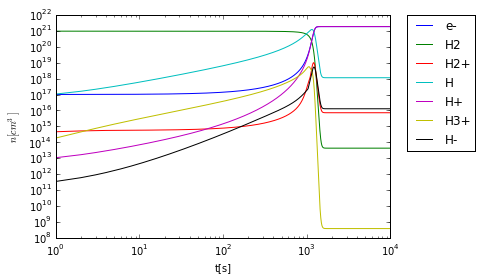

In [11]:
loglog(cas[:], vyvoj[:,0], label = "e-")
loglog(cas[:], vyvoj[:,1], label = "H2")
loglog(cas[:], vyvoj[:,2], label = "H2+")
loglog(cas[:], vyvoj[:,3], label = "H")
loglog(cas[:], vyvoj[:,4], label = "H+")
loglog(cas[:], vyvoj[:,5], label = "H3+")
loglog(cas[:], vyvoj[:,6], label = "H-")

xlabel("t[s]")
ylabel("$n[cm^3]$")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)